<a href="https://colab.research.google.com/github/Brunoxue/hsi_examples/blob/main/dimension_reduction_tite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperspectral Demension Reduction with Synthetic Target Implantation (TI) and Target Embeddedness (TE) Datasets Using Python

In this demo project, we will demostrate various techniques for dimension reduction in hyperspectral images with Python.


## 1. Download the Dataset from Github
Downloads the dataset by cloning the tite GitHub repository to the local environment. The dataset is stored in a folder named tite.

In [ ]:
# Get dataset from Github repo
!git clone https://github.com/Brunoxue/tite.git

fatal: destination path 'tite' already exists and is not an empty directory.


## 2. Importing Required Libraries
The ```scipy.io.loadmat``` is used to load .mat (MATLAB) files. The ```numpy``` is a library for handling arrays and performing numerical operations. The ```sklearn.decomposition``` provides implementations for various dimensionality reduction techniques. And the ```matplotlib``` is used for data visualization, specifically plotting images and graphs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from scipy.io import loadmat

## 3. Loading the Dataset
First, we can load the variables from the tite_reflectance.mat file into the Python environment.

In [ ]:
# Load datasets
hsiFile = loadmat('tite/tite_reflectance.mat')
ti2=hsiFile['TE2'].astype(np.double)

## 4. Principal Component Analysis (PCA)
This block demonstrates how to apply Principal Component Analysis (PCA) for dimension reduction of a Hyperspectral Image (HSI) and visualize the results. After PCA, the data is visualized by showing the first 6 principal components as 2D images, which represent the main spectral variance in the original HSI data.


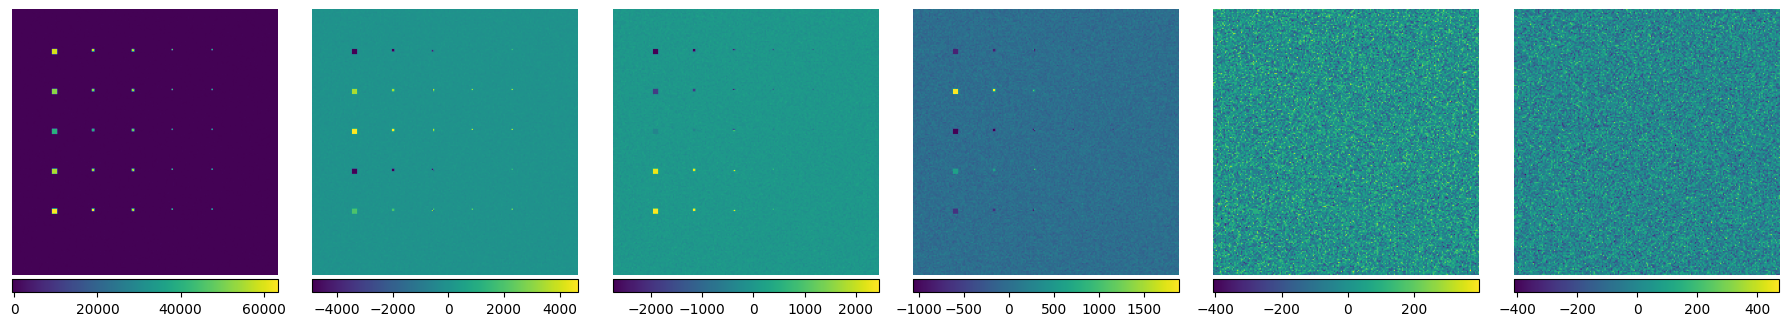

In [ ]:
# Number of principal components to retain
n_components = 6

# Reshape HSI
x, y, L = ti2.shape
N = x * y
r = np.reshape(ti2, (N, L))

# Apply PCA
pca = PCA()
PCAScore = pca.fit_transform(r)

# Reshape back to original dimensions
# Only the first n_components principal components are kept
PCAScore = np.reshape(PCAScore[:,0:n_components],(x, y, n_components))

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=n_components, figsize=(18, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(n_components):
    im = axs[idx].imshow(PCAScore[:, :, idx], cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)
plt.tight_layout()
plt.show()

## 5. Maximum Noise Fraction (MNF)

This block of Python code demonstrates how to apply the Maximum Noise Fraction (MNF) transform to reduce the spectral dimension of a Hyperspectral Image (HSI) and visualize the results. MNF is useful for separating signal from noise and improving data quality. Noise is estimated by calculating the differences between consecutive pixels in the HSI data along the spatial dimension (Green et. al, 1988).

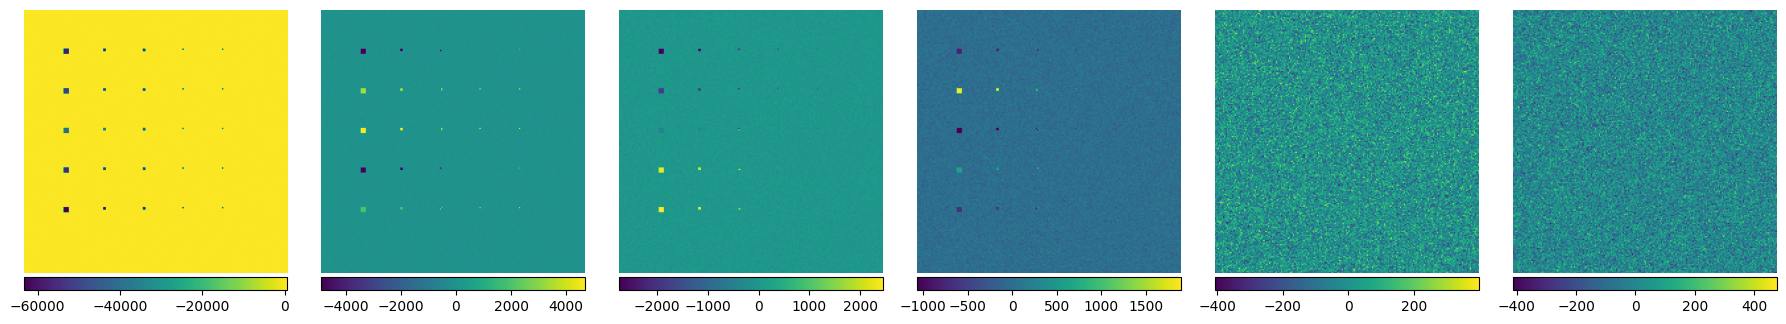

In [ ]:
# Maximum Noise Fraction (MNF) Function
def MNF(hsi):
    x, y, L = hsi.shape
    N = x * y
    reshaped_hsi = hsi.reshape(N, L)

    # Center the data
    mean_vec = np.mean(reshaped_hsi, axis=0)
    centered_data = reshaped_hsi - mean_vec

    # Estimate noise using differences between consecutive pixels
    noise_fraction = np.diff(hsi, axis=0)
    x_n, y_n, L = noise_fraction.shape
    N_n = x_n * y_n
    reshaped_noise = noise_fraction.reshape(N_n, L)

    # Estimate noise covariance matrix
    nR = (reshaped_noise.T @ reshaped_noise) / N_n

    # Perform SVD (similar to PCA on noise)
    V, _, _ = np.linalg.svd(nR, full_matrices=False)

    # Project data onto the noise subspace
    results = PCA().fit_transform(reshaped_hsi @ V)
    hsi_mnf = results.reshape(x, y, L)

    return hsi_mnf

# Number of principal components to retain
n_components = 6
# Apply MNF
MNFResults = MNF(ti2)
# Only the first n_components components are kept
MNFResults = MNFResults[:,:,0:n_components]

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=n_components, figsize=(18, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(n_components):
    im = axs[idx].imshow(MNFResults[:, :, idx], cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)
plt.tight_layout()
plt.show()

## 6. Non-negative Matrix Factorization (NMF)
This block applies NMF to reduce the spectral dimensionality of hyperspectral data while ensuring that the resulting components are non-negative. NMF is utilized for the dimensionality reduction purpose that decomposes the data into non-negative factors. It is especially useful for data with natural non-negativity constraints.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


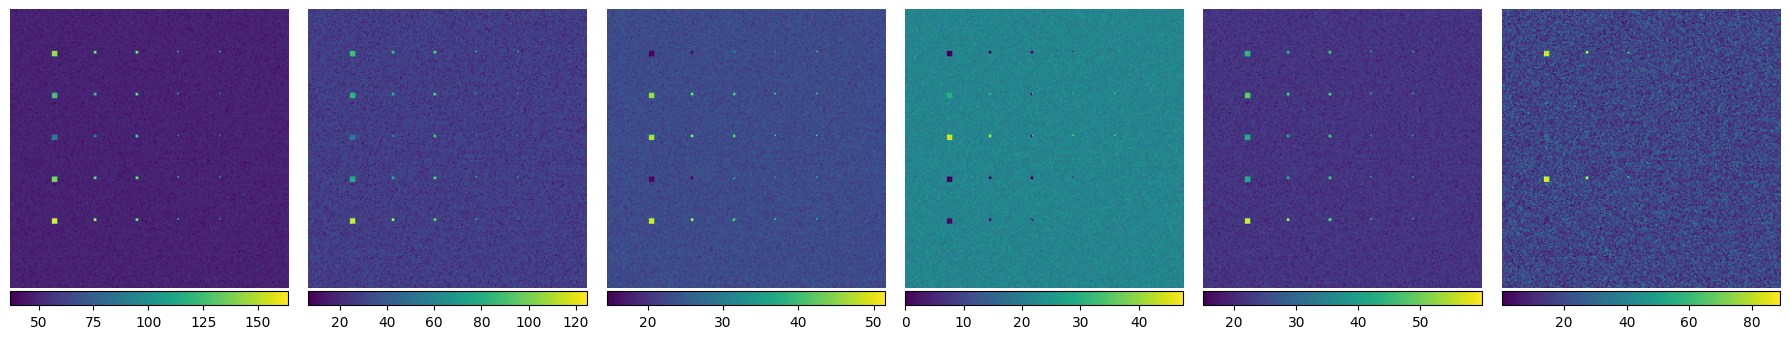

In [ ]:
# Number of principal components to retain
n_components = 6

# Reshape HSI
x, y, L = ti2.shape
N = x * y
r = np.reshape(ti2, (N, L))

# Apply NMF
nmf = NMF(n_components=n_components, init='random', random_state=0)
W = nmf.fit_transform(r)
H = nmf.components_
NMFResult = W.reshape(x, y, n_components)

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(18, 4), subplot_kw={'xticks': [], 'yticks': []})
for idx in range(6):
    im = axs[idx].imshow(NMFResult[:, :, idx], cmap='viridis')
    axs[idx].axis('off')
    fig.colorbar(im, ax=axs[idx], orientation='horizontal', pad=0.01)
plt.tight_layout()
plt.show()